## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results)

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_number = merged_df["Mouse ID"].count()


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_dup = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_number2 = merged_df["Mouse ID"].count()


## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mean
means = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

#median
medians = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

#variance
variance = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

#standard deviaton
std = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

#SEM
sems = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean": means,
                                  "Median" : medians,
                                  "variance": variance,
                                  "Std Deviation" : std,
                                  "SEM": sems})

summary_df

# Using the aggregation method, produce the same summary statistics in a single line




,Mean,Median,variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
summary2_df = merged_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
summary2_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

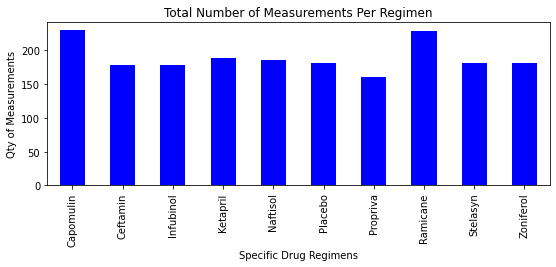

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements = merged_df.groupby(["Drug Regimen"])
total_count = total_measurements["Mouse ID"].count()
total_count.plot(kind="bar", color="blue", figsize=(9,3), width=0.5)

plt.title("Total Number of Measurements Per Regimen")
plt.xlabel("Specific Drug Regimens")
plt.ylabel("Qty of Measurements")

plt.show()


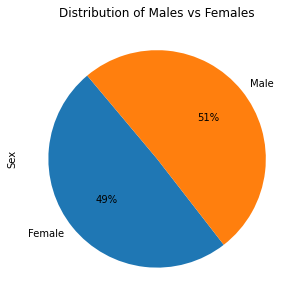

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = merged_df.groupby(["Sex"])
sex_count = sex_data["Sex"].count()
plt.figure(figsize=(10,5))

plt.title("Distribution of Males vs Females")
sex_labels= sex_count.index

sex_count.plot(kind="pie", startangle=130, autopct="%1.0f%%", legend=False, labels=sex_labels)

plt.show()



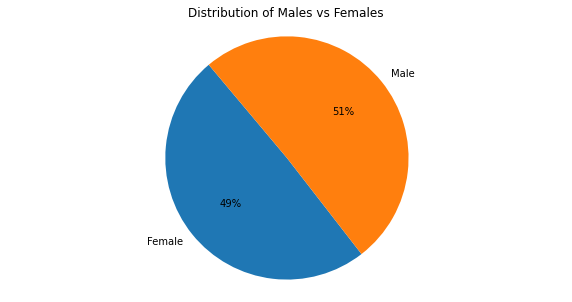

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels= sex_count.index

plt.figure(figsize=(10,5))

plt.title("Distribution of Males vs Females")
plt.pie(sex_count, labels=sex_labels, startangle=130, autopct="%1.0f%%")

plt.axis("equal") 
plt.show()



## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint=pd.DataFrame(merged_df.groupby(["Mouse ID"])["Timepoint"].max())
merged_timepoint = pd.merge(merged_df, timepoint.reset_index(), on=["Mouse ID", "Timepoint"], how="inner")


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = merged_timepoint["Drug Regimen"].unique().tolist()


# Create empty list to fill with tumor vol data (for plotting)
drug_regimens = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = merged_df.loc[merged_df["Mouse ID"] 



SyntaxError: unexpected EOF while parsing (<ipython-input-53-ee95fba816fd>, line 3)

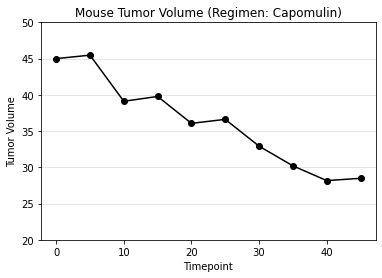

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.title("Mouse Tumor Volume (Regimen: Capomulin)")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepoint")
plt.ylim(20,50)
plt.grid(True, linestyle="-", axis ="y", which="major", color="gray", alpha=0.25)

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], color="black", marker="o")
plt.show()


## Correlation and Regression

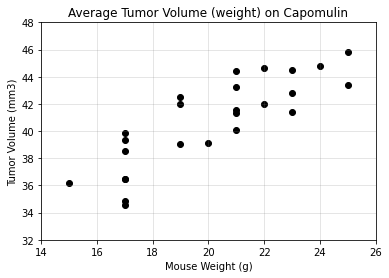

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()


plt.title("Average Tumor Volume (weight) on Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(32,48)
plt.xlim(14,26)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"], color="black", marker="o")
plt.show()
